In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

from math import sqrt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df1 = pd.read_csv('traincleaned.csv')

In [3]:
df1.head()

,0,1,2,3,4,5,6,7,8,9,loan_amount,applicant_income,rate_spread
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.025077,0.042033,1
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.122230,-0.298088,2
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.178347,-0.375830,3
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.600277,-0.346677,6
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.824745,-0.259217,4


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
0                   200000 non-null float64
1                   200000 non-null float64
2                   200000 non-null float64
3                   200000 non-null float64
4                   200000 non-null float64
5                   200000 non-null float64
6                   200000 non-null float64
7                   200000 non-null float64
8                   200000 non-null float64
9                   200000 non-null float64
loan_amount         200000 non-null float64
applicant_income    200000 non-null float64
rate_spread         200000 non-null int64
dtypes: float64(12), int64(1)
memory usage: 19.8 MB


In [5]:
df1.describe()

,0,1,2,3,4,5,6,7,8,9,loan_amount,applicant_income,rate_spread
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,2.000000e+05,2.000000e+05,200000.000000
mean,0.453525,0.531540,0.005410,0.009525,0.846310,0.152500,0.001190,0.730515,0.056365,0.213120,3.992973e-17,2.617209e-16,1.974370
std,0.497837,0.499005,0.073354,0.097130,0.360652,0.359506,0.034476,0.443693,0.230626,0.409513,1.000003e+00,1.000003e+00,1.593451
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.930963e-01,-6.965148e-01,1.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.301305e-01,-3.175233e-01,1.000000
50%,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-1.864135e-01,-1.620397e-01,1.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.555084e-01,7.118587e-02,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.689038e+01,9.687922e+01,8.000000


In [6]:
df1.shape

(200000, 13)

In [7]:
array = df1.values

In [8]:
type(array)

numpy.ndarray

In [9]:
X = array[:,0:12]
y = array[:,12]

In [10]:
X.shape

(200000, 12)

In [11]:
y.shape

(200000,)

### Perform K-Fold Cross Validation

In [ ]:
kf = KFold(n_splits=10,random_state=0,shuffle=True)
kf

In [ ]:
for train_index, test_index in kf.split([1,2,3,4,5,6,7,8,9,10]):
    print(train_index,test_index)

### Using Grid Search to find best parameters

In [13]:
adamodel = AdaBoostRegressor(random_state=0)

In [15]:
params_grid = {'n_estimators': [50, 100, 150]}

In [16]:
grid_search_ada = GridSearchCV(adamodel,params_grid,scoring='r2',n_jobs=-1,cv=5,verbose=True)

In [17]:
grid_search_ada.fit(X,y)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   27.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0,
                                         loss='linear', n_estimators=50,
                                         random_state=0),
             iid='warn', n_jobs=-1, param_grid={'n_estimators': [50, 100, 150]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=True)

In [20]:
grid_search_ada.best_params_

{'n_estimators': 50}

In [21]:
adamodel = AdaBoostRegressor(n_estimators=50,random_state=0)

In [22]:
params_grid = {'learning_rate': [0.05, 0.1, 0.5, 1.0]}

In [23]:
grid_search_ada = GridSearchCV(adamodel,params_grid,scoring='r2',n_jobs=-1,cv=5,verbose=True)

In [24]:
grid_search_ada.fit(X,y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.4min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0,
                                         loss='linear', n_estimators=50,
                                         random_state=0),
             iid='warn', n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.5, 1.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=True)

In [25]:
grid_search_ada.best_params_

{'learning_rate': 0.05}

In [26]:
adamodel = AdaBoostRegressor(n_estimators=50,learning_rate=0.05,random_state=0)

In [28]:
params_grid = {'loss' : ['linear', 'square', 'exponential']}

In [29]:
grid_search_ada = GridSearchCV(adamodel,params_grid,scoring='r2',n_jobs=-1,cv=5,verbose=True)

In [30]:
grid_search_ada.fit(X,y)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  1.5min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=AdaBoostRegressor(base_estimator=None,
                                         learning_rate=0.05, loss='linear',
                                         n_estimators=50, random_state=0),
             iid='warn', n_jobs=-1,
             param_grid={'loss': ['linear', 'square', 'exponential']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=True)

In [31]:
grid_search_ada.best_params_

{'loss': 'exponential'}

**Best parameters are n_estimators = 50, learning rate = 0.05, loss = 'exponential'**

### Load in test set

In [33]:
X_test = pd.read_csv('testmodified.csv')

In [34]:
X_test.head()

,0,1,2,3,4,5,6,7,8,9,loan_amount,applicant_income
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.665492,-0.218602
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.185659,0.774446
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.213116,0.273193
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.185004,-0.209144
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.239917,0.140787


In [35]:
X_test.shape

(200000, 12)

### Perform Round 1 using Best Hyperparameter without estimator

In [36]:
adamodel = AdaBoostRegressor(n_estimators=50,learning_rate=0.05,loss='exponential',random_state=0)

In [37]:
adamodel.fit(X,y)

AdaBoostRegressor(base_estimator=None, learning_rate=0.05, loss='exponential',
                  n_estimators=50, random_state=0)

In [38]:
y_predict = adamodel.predict(X_test)

In [39]:
y_predict

array([5.14531337, 2.02199668, 2.02199668, ..., 1.34540421, 1.34540421,
       1.34540421])

In [40]:
y_predict.shape

(200000,)

### Model Evaluation

In [41]:
MSE = mean_squared_error(y,y_predict)
print("Mean Squared Error is", MSE)

Mean Squared Error is 3.6218742048930865


In [42]:
RMSE = format(np.sqrt(MSE),'.3f')
print("RMSE is", RMSE)

RMSE is 1.903


In [44]:
MAE = mean_absolute_error(y,y_predict)
print("MAE is", MAE)

MAE is 1.3291896822935811


In [46]:
r2 = r2_score(y,y_predict)
print("R2 score is", r2)

R2 score is -0.42645526844858317


### Round 2 - Add RF as base estimator

In [51]:
rf = RandomForestRegressor(n_estimators=250,n_jobs=-1,random_state=0,verbose=True)

In [52]:
adamodel2 = AdaBoostRegressor(base_estimator=rf,n_estimators=50,learning_rate=0.05,loss='exponential',random_state=0)

In [53]:
adamodel2.fit(X,y)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   43.6s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   56.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    1.3s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    5.9s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    7.7s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   42.8s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   55.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    1.2s
[Parallel(n_jobs=4)]: Done 192 task

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   43.6s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   56.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    1.3s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    5.7s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    7.5s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   44.6s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   57.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    1.2s
[Parallel(n_jobs=4)]: Done 192 task

KeyboardInterrupt: 

In [ ]:
y_predict2 = adamodel2.predict(X_test)

In [ ]:
y_predict2

In [ ]:
y_predict2.shape

In [ ]:
MSE = mean_squared_error(y,y_predict2)
print("Mean Squared Error is", MSE)

In [ ]:
RMSE = format(np.sqrt(MSE),'.3f')
print("RMSE is", RMSE)

In [ ]:
MAE = mean_absolute_error(y,y_predict2)
print("MAE is", MAE)

In [ ]:
r2 = r2_score(y,y_predict2)
print("R2 score is", r2)

### Save the results

In [54]:
adaprediction = pd.DataFrame(y_predict)

In [55]:
adaprediction

,0
0,5.145313
1,2.021997
2,2.021997
3,2.021997
4,2.021997
...,...
199995,2.021997
199996,2.021997
199997,1.345404
199998,1.345404


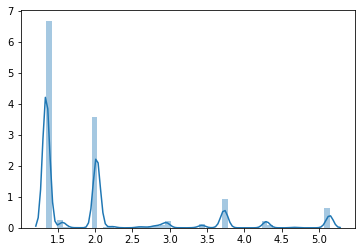

In [56]:
sns.distplot(adaprediction)
plt.show()

In [57]:
adaprediction.to_csv('adaboostresult.csv')

**Result is 0.4824**